In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [21]:
data1 = pd.read_csv("C:/pwskills_python_codes/whatsapp-chat-analysis/dataset/Emotion(happy).csv")
data2 = pd.read_csv("C:/pwskills_python_codes/whatsapp-chat-analysis/dataset/Emotion(sad).csv")
data3 = pd.read_csv("C:/pwskills_python_codes/whatsapp-chat-analysis/dataset/Emotion(angry).csv")

In [25]:
data.head()

,content,sentiment
0,Wants to know how the hell I can remember word...,happy
1,Love is a long sweet dream & marriage is an al...,happy
2,The world could be amazing when you are slight...,happy
3,My secret talent is getting tired without doin...,happy
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happy


In [24]:
data = pd.concat([data1, data2, data3], ignore_index=True)

<Axes: xlabel='sentiment', ylabel='count'>

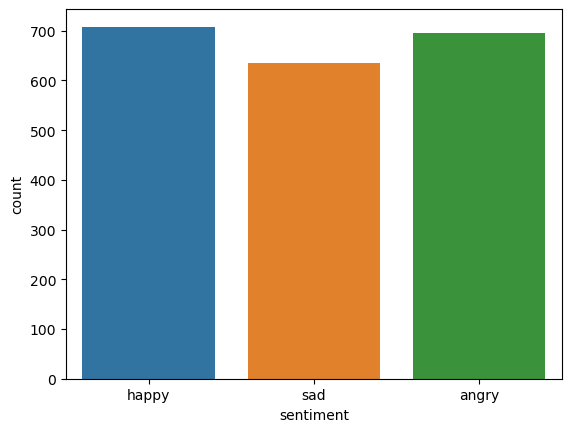

In [26]:
sns.countplot(x='sentiment',data=data)

In [41]:
X = data.content
Y = data.sentiment
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

2 : sad
1 : happy
0 : angry

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [49]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [50]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [54]:
model = RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 3)                 771 

In [55]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=20,
          validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 4s 170ms/step - loss: 1.0950 - accuracy: 0.3795 - val_loss: 1.0866 - val_accuracy: 0.4553
Epoch 2/20
11/11 [==============================] - 1s 123ms/step - loss: 1.0739 - accuracy: 0.4668 - val_loss: 1.0520 - val_accuracy: 0.5072
Epoch 3/20
11/11 [==============================] - 1s 125ms/step - loss: 1.0245 - accuracy: 0.4877 - val_loss: 1.0029 - val_accuracy: 0.4957
Epoch 4/20
11/11 [==============================] - 1s 135ms/step - loss: 0.9521 - accuracy: 0.5620 - val_loss: 0.9061 - val_accuracy: 0.5562
Epoch 5/20
11/11 [==============================] - 1s 124ms/step - loss: 0.8694 - accuracy: 0.6248 - val_loss: 0.8299 - val_accuracy: 0.6311
Epoch 6/20
11/11 [==============================] - 2s 142ms/step - loss: 0.7569 - accuracy: 0.7114 - val_loss: 0.7755 - val_accuracy: 0.6110
Epoch 7/20
11/11 [==============================] - 2s 149ms/step - loss: 0.6598 - accuracy: 0.7446 - val_loss: 0.7215 - val_accuracy: 0.6628
Epoch 

In [56]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [57]:
accr = model.evaluate(test_sequences_matrix,Y_test)

10/10 [==============================] - 0s 22ms/step - loss: 0.8603 - accuracy: 0.7712


In [58]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.860
  Accuracy: 0.771


In [73]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [74]:
accr = model.evaluate(test_sequences_matrix,Y_test)

10/10 [==============================] - 0s 24ms/step - loss: 0.8603 - accuracy: 0.7712


In [75]:
from tensorflow import keras

# Save model
model.save('my_model.h5')

# Load model
loaded_model = keras.models.load_model('my_model.h5')


c:\Users\Ankit\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
loaded_model = keras.models.load_model('my_model.h5')

In [77]:
loaded_model